In [ ]:
import pandas as pd
import os
from sqlalchemy import create_engine

import logging
import time

logging.basicConfig(
    filename="logs/ingestion_db.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

engine = create_engine('sqlite:///inventory.db')

def ingest_db(df, table_name, engine):
    '''this function will ingest the dataframe into database table'''
    df.to_sql(table_name, con = engine, if_exists = 'replace', index = False)
    
def load_raw_data():
    '''this function will load the CSVs as dataframe and ingest into db'''
    start = time.time()
    for file in os.listdir('data'):
        if '.csv' in file:
            df = pd.read_csv('data/'+file)
            logging.info(f'Ingesting {file} in db')
            ingest_db(df, file[:-4], engine)
    end = time.time()
    total_time = (end - start)/60
    logging.info('------------Ingestion Complete-------------------')

    
    logging.info(f'\nTotal Time Taken: {total_time} minutes')

if __name__ =='__main__':
    load_raw_data()

# Exploratory Data Analysis
             

In [ ]:
# creating database connection
import sqlite3
import pandas as pd
conn = sqlite3.connect('Inventory.db')

In [41]:
# checking tables present in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
tables

,name
0,vendor_sales_summary
1,begin_inventory
2,end_inventory
3,purchases
4,purchase_prices
5,sales
6,vendor_invoice


In [42]:
for table in tables['name']:
    print('-'*50, f'{table}', '-'*50)
    print('Count of records:', pd.read_sql(f"select count(*) as count from {table}", conn)['count'].values[0])
    display(pd.read_sql(f"select * from {table} limit 5", conn))

-------------------------------------------------- vendor_sales_summary --------------------------------------------------
Count of records: 10692


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


-------------------------------------------------- begin_inventory --------------------------------------------------
Count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
Count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
Count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- purchase_prices --------------------------------------------------
Count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
Count of records: 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


In [43]:
purchases = pd.read_sql_query("select * from purchases where VendorNumber = 4466", conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [44]:
purchase_prices= pd.read_sql_query("select * from purchase_prices where VendorNumber = 4466", conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [45]:
sales = pd.read_sql_query("""select * from sales where VendorNo = 4466""", conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [9]:
purchases.groupby(['Brand', 'PurchasePrice'])[['Quantity', 'Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [46]:
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [47]:
vendor_invoice = purchase_prices= pd.read_sql_query("select * from  vendor_invoice  where VendorNumber = 4466", conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [48]:
vendor_invoice['PONumber'].nunique()

55

In [49]:
vendor_invoice.shape

(55, 10)

In [50]:
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [15]:
sales.groupby('Brand')[['SalesDollars', 'SalesPrice', 'SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
3140,50531.10,30071.85,3890
5215,60416.49,41542.02,4651
5255,79187.04,51180.60,6096


In [51]:
freight_summary = pd.read_sql_query("""select VendorNumber, SUM(Freight) as FreightCost
From vendor_invoice
Group By VendorNumber""", conn)

In [52]:
freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [53]:
pd.read_sql_query("""SELECT
    p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.PurchasePrice,
    pp.Volume,
    pp.Price as ActualPrice,
    SUM(Quantity) as TotalPurchaseQuantity,
    SUM(Dollars) as TotalPurchaseDollars
    FROM purchases as p
    JOIN purchase_prices as pp
    ON p.Brand = pp.Brand
    where p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand
    ORDER BY TotalPurchaseDollars""", conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [19]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [20]:
pd.read_sql_query("""SELECT 
   VendorNo,
   Brand,
   SUM(SalesDollars) as TotalSalesDollars,
   SUM(SalesPrice) as TotalSalesPrice,
   SUM(SalesQuantity) as TotalSalesQuantity,
   SUM(ExciseTax) as TotalExciseTax
   FROM sales
   GROUP BY VendorNo, Brand
   ORDER BY TotalSalesDollars""", conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,8004,5287,0.98,0.98,2,0.10
1,9206,2773,0.99,0.99,1,0.05
2,3252,3933,1.98,0.99,2,0.10
3,3924,9123,1.98,0.99,2,0.10
4,10050,3623,1.98,1.98,2,0.10
...,...,...,...,...,...,...
11267,3960,3545,4223107.62,545778.28,135838,249587.83
11268,3960,4261,4475972.88,420050.01,200412,368242.80
11269,17035,8068,4538120.60,461140.15,187140,343854.07
11270,4425,3405,4819073.49,561512.37,160247,294438.66


In [21]:
import time
start = time.time()
final_table = pd.read_sql_query("""SELECT
     pp.VendorNumber,
     pp.Brand,
     pp.Price,
     pp.PurchasePrice,
     SUM(s.SalesQuantity) AS TotalSalesQuantity,
     SUM(s.SalesDollars) AS TotalSalesDollars,
     SUM(s.SalesPrice) AS TotalSalesPrice,
     SUM(s.ExciseTax) AS TotalExciseTax,
     SUM(vi.Quantity) AS TotalPurchaseQuantity,
     SUM(vi.Dollars) AS TotalPurchaseDollars,
     SUM(vi.Freight) AS TotalFreightCost
FROM purchase_prices as pp
JOIN sales as s
     ON pp.VendorNumber = s.VendorNo
     AND pp.Brand = s.Brand
JOIN vendor_invoice as vi
     ON pp.VendorNumber = vi.VendorNumber
GROUP BY pp.VendorNumber, pp.Brand, pp.Price, pp.PurchasePrice
""", conn)
end = time.time()

In [22]:
vendor_sales_summary = pd.read_sql_query(""" WITH FreightSummary AS (
      SELECT
           VendorNumber,
           SUM(Freight) AS FreightCost
     FROM vendor_invoice
     GROUP BY VendorNumber
),

PurchaseSummary AS (
      SELECT
           p.VendorNumber,
           p.VendorName,
           p.Brand,
           p.Description,
           p.PurchasePrice,
           pp.Price AS ActualPrice,
           pp.Volume,
           SUM(p.Quantity) AS TotalPurchaseQuantity,
           SUM(p.Dollars) AS TotalPurchaseDollars
     FROM purchases as p
     JOIN purchase_prices as pp
          ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Price, pp.Volume
),

SalesSummary AS (
     SELECT
          VendorNo,
          Brand,
          SUM(SalesQuantity) AS TotalSalesQuantity,
          SUM(SalesDollars) AS TotalSalesDollars,
          SUM(SalesPrice) AS TotalSalesPrice,
          SUM(ExciseTax) AS TotalExciseTax
     FROM sales
     GROUP BY VendorNo, Brand
)

SELECT
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.freightCost
FROM PurchaseSummary as ps
LEFT JOIN SalesSummary as ss
    ON ps.VendorNumber = ss.VendorNo
    AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs
    ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC""", conn)


In [23]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,15.95,10.96,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,65.66,1.47,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2.0,1.98,0.99,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72.0,143.28,77.61,15.12,257032.07


In [24]:
vendor_sales_summary.shape

(10692, 14)

In [25]:
vendor_sales_summary.isnull().sum()

VendorNumber               0
VendorName                 0
Brand                      0
Description                0
PurchasePrice              0
ActualPrice                0
Volume                     0
TotalPurchaseQuantity      0
TotalPurchaseDollars       0
TotalSalesQuantity       178
TotalSalesDollars        178
TotalSalesPrice          178
TotalExciseTax           178
FreightCost                0
dtype: int64

In [26]:
vendor_sales_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorNumber           10692 non-null  int64  
 1   VendorName             10692 non-null  object 
 2   Brand                  10692 non-null  int64  
 3   Description            10692 non-null  object 
 4   PurchasePrice          10692 non-null  float64
 5   ActualPrice            10692 non-null  float64
 6   Volume                 10692 non-null  object 
 7   TotalPurchaseQuantity  10692 non-null  int64  
 8   TotalPurchaseDollars   10692 non-null  float64
 9   TotalSalesQuantity     10514 non-null  float64
 10  TotalSalesDollars      10514 non-null  float64
 11  TotalSalesPrice        10514 non-null  float64
 12  TotalExciseTax         10514 non-null  float64
 13  FreightCost            10692 non-null  float64
dtypes: float64(8), int64(3), object(3)
memory usage: 1.1+ 

In [27]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

In [28]:
vendor_sales_summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Crown Royal Apple',
       'Concannon Glen Ellen Wh Zin', 'The Club Strawbry Margarita'],
      dtype=object)

In [29]:
vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float64')

In [30]:
vendor_sales_summary.fillna(0, inplace = True)

In [31]:
vendor_sales_summary['VendorName'] = vendor_sales_summary['VendorName'].str.strip()

In [32]:
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']

In [33]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81


In [34]:
vendor_sales_summary['GrossProfit'].min()

-52002.780000000006

In [35]:
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars']) *100

In [36]:
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']

In [37]:
vendor_sales_summary['SalestoPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars']/vendor_sales_summary['TotalPurchaseDollars']

In [38]:
cursor = conn.cursor()

In [ ]:
cursor.execute ("""CREATE TABLE vendor_sales_summary (
       VendorNumber INT,
       VendorName VARCHAR(100),
       Brand INT,
       Description VARCHAR(100),
       PurchasePrice DECIMAL(10,2),
       ActualPrice DECIMAL(10,2),	
       Volume ,	
       TotalPurchaseQuantity INT, 	
       TotalPurchaseDollars DECIMAL(15,2),
       TotalSalesQuantity INT, 	
       TotalSalesDollars DECIMAL(15,2), 	
       TotalSalesPrice DECIMAL(15,2),
       TotalExciseTax DECIMAL(15,2),
       FreightCost DECIMAL(15,2),
       GrossProfit DECIMAL(15,2),
       ProfitMargin DECIMAL(15,2),
       StockTurnover DECIMAL(15,2),
       SalesToPurchaseRatio DECIMAL(15,2),
       PRIMARY KEY (VendorNumber, Brand)
);
""")

In [ ]:
pd.read_sql_query("select * from vendor_sales_summary", conn)

In [ ]:
vendor_sales_summary.to_sql('vendor_sales_summary', conn, if_exists = 'replace', index = False)
                            

In [ ]:
import sqlite3
import pandas as pd
import logging
# Assuming 'from ingestion_db import ingest_db' is correct and that module is available

logging.basicConfig(
    filename="logs/get_vendor_summary.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

def create_vendor_summary(conn):
    '''this function will merge the different tables to get the overall vendor summary and adding new columns in the resultant data'''
    vendor_sales_summary = pd.read_sql_query(""" WITH FreightSummary AS (
      SELECT
           VendorNumber,
           SUM(Freight) AS FreightCost
     FROM vendor_invoice
     GROUP BY VendorNumber
),
 PurchaseSummary AS (
      SELECT
           p.VendorNumber,
           p.VendorName,
           p.Brand,
           p.Description,
           p.PurchasePrice,
           pp.Price AS ActualPrice,
           pp.Volume,
           SUM(p.Quantity) AS TotalPurchaseQuantity,
           SUM(p.Dollars) AS TotalPurchaseDollars
     FROM purchases as p
     JOIN purchase_prices as pp
          ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Price, pp.Volume
),
 SalesSummary AS (
     SELECT
          VendorNo,
          Brand,
          SUM(SalesQuantity) AS TotalSalesQuantity,
          SUM(SalesDollars) AS TotalSalesDollars,
          SUM(SalesPrice) AS TotalSalesPrice,
          SUM(ExciseTax) AS TotalExciseTax
     FROM sales
     GROUP BY VendorNo, Brand
)
 SELECT
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.freightCost
FROM PurchaseSummary as ps
LEFT JOIN SalesSummary as ss
    ON ps.VendorNumber = ss.VendorNo
    AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs
    ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC""", conn)

    return vendor_sales_summary

def clean_data(df):
    '''this function will clean the data'''
    # changing datatype to float
    df['Volume'] = df['Volume'].astype('float')

    # filling missing value with 0
    df.fillna(0, inplace=True)

    # removing spaces from categorical columns
    df['VendorName'] = df['VendorName'].str.strip()
    df['Description'] = df['Description'].str.strip()

    # creating new columns for better analysis
    df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
    df['ProfitMargin'] = (df['GrossProfit'] / df['TotalSalesDollars']) *100
    df['StockTurnover'] = df['TotalSalesQuantity']/df['TotalPurchaseQuantity']
    df['SalestoPurchaseRatio'] = df['TotalSalesDollars']/df['TotalPurchaseDollars']

    return df

if __name__ == '__main__':
        # creating database connection
        conn = sqlite3.connect('inventory.db')

        logging.info('Creating Vendor Summary Table....')
        summary_df = create_vendor_summary(conn)
        logging.info(summary_df.head())

        logging.info('Cleaning Data....')
        clean_df = clean_data(summary_df)
        logging.info(clean_df.head())

        logging.info('Ingesting data....')
        # Assuming ingest_db is defined correctly in ingestion_db
        ingest_db(clean_df, 'vendor_sales_summary', conn)
        logging.info('Completed')


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')
    

In [54]:
# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# Exploratory Data Analysis

In [55]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


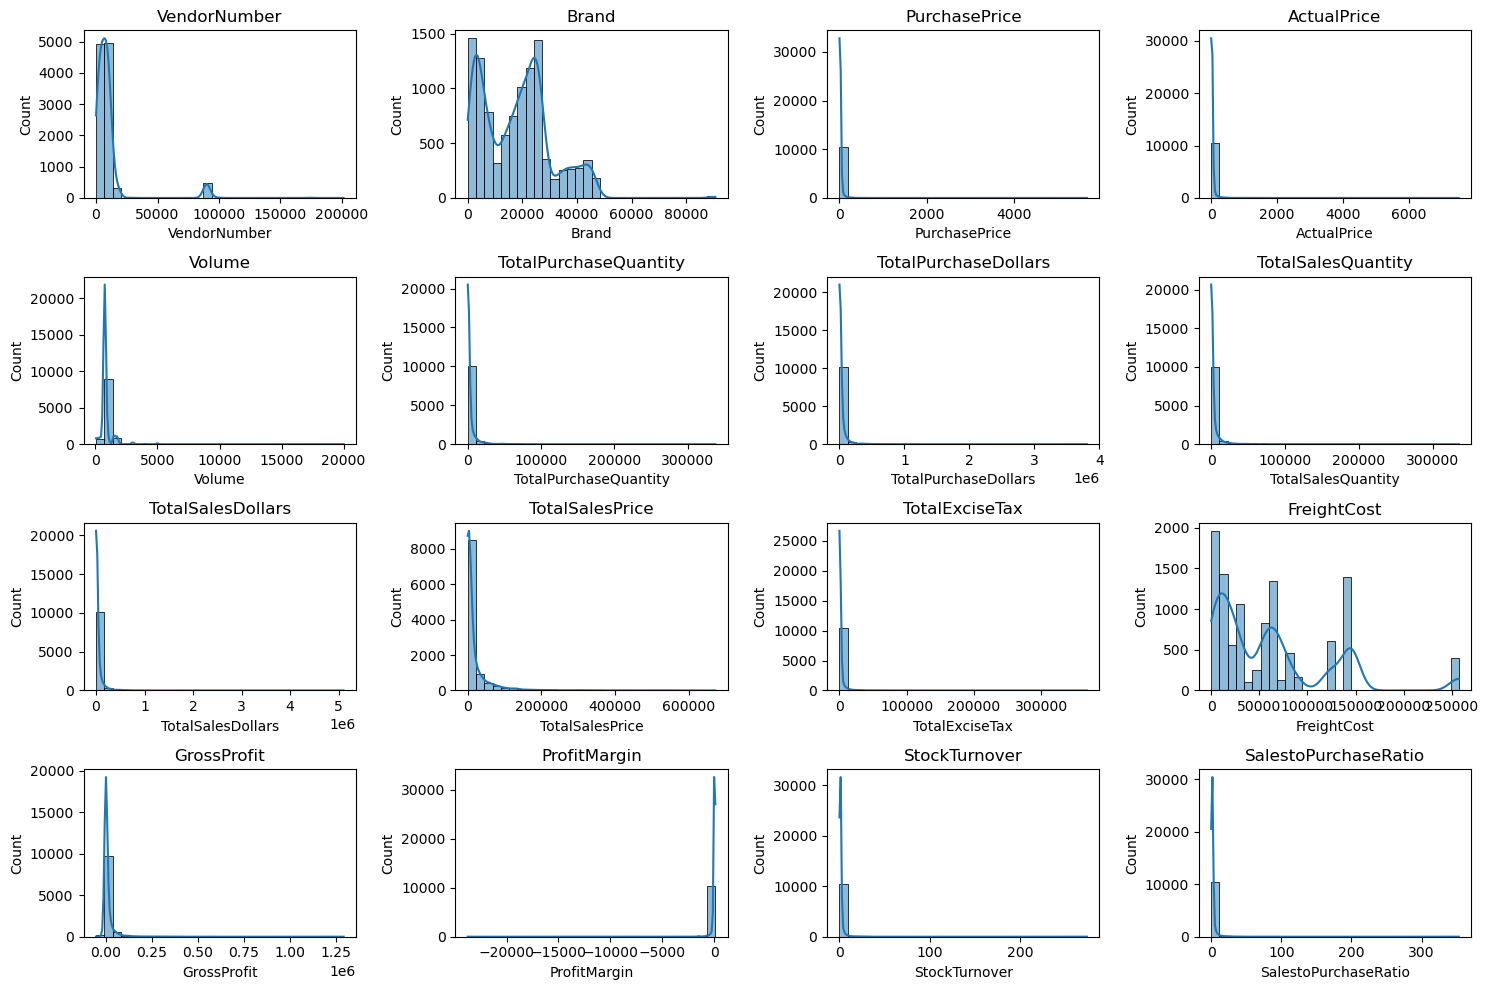

In [58]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

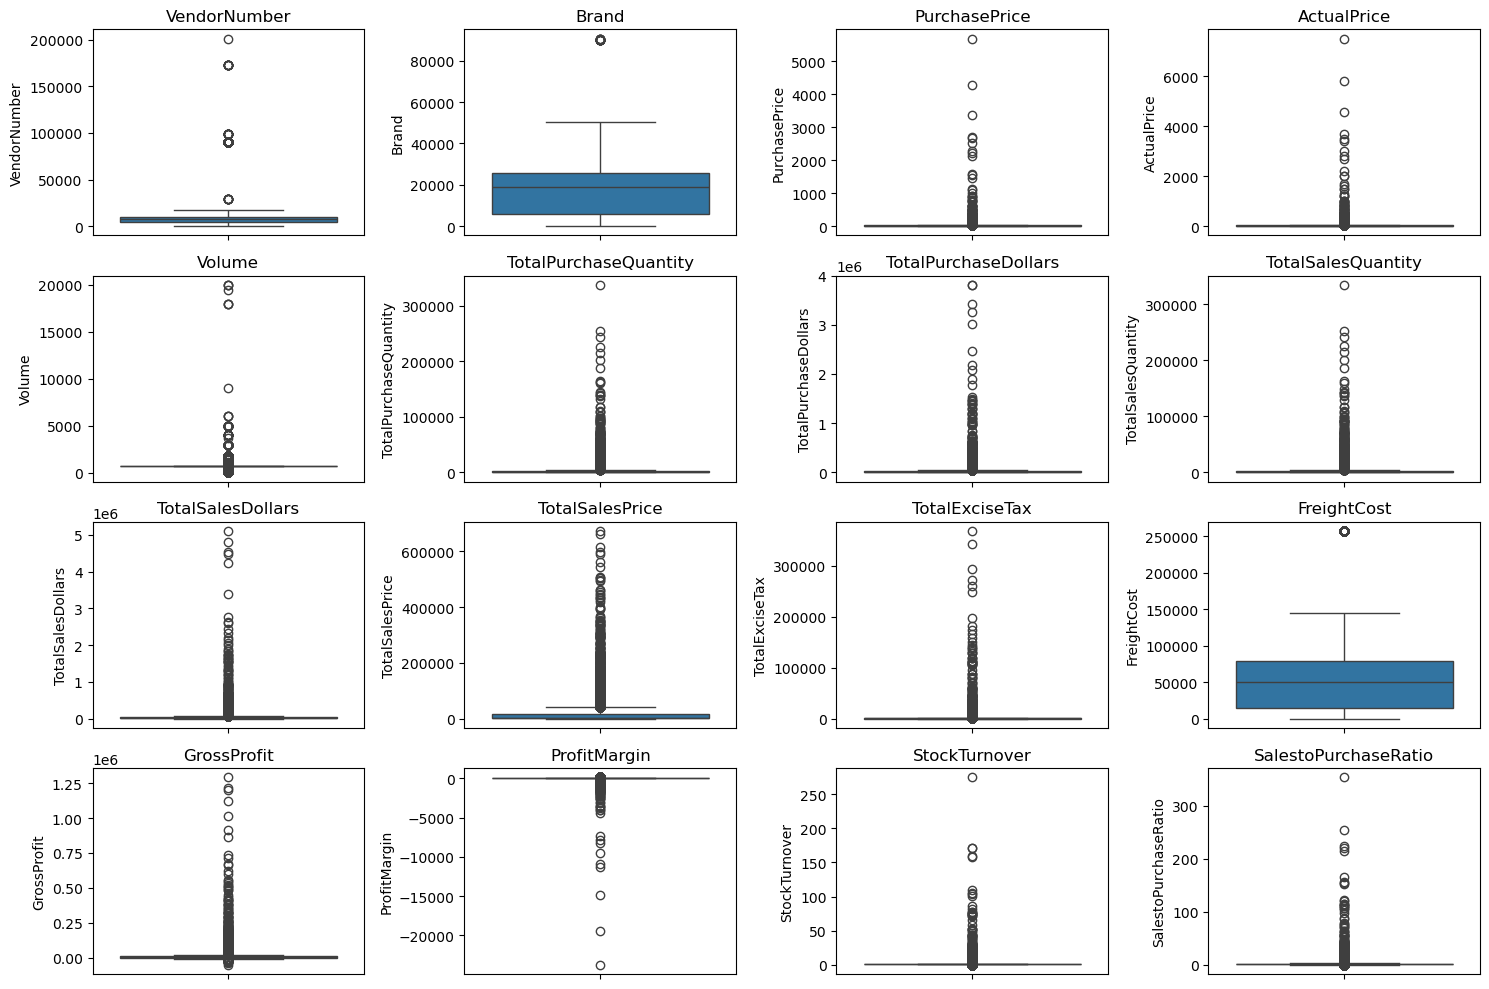

In [59]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

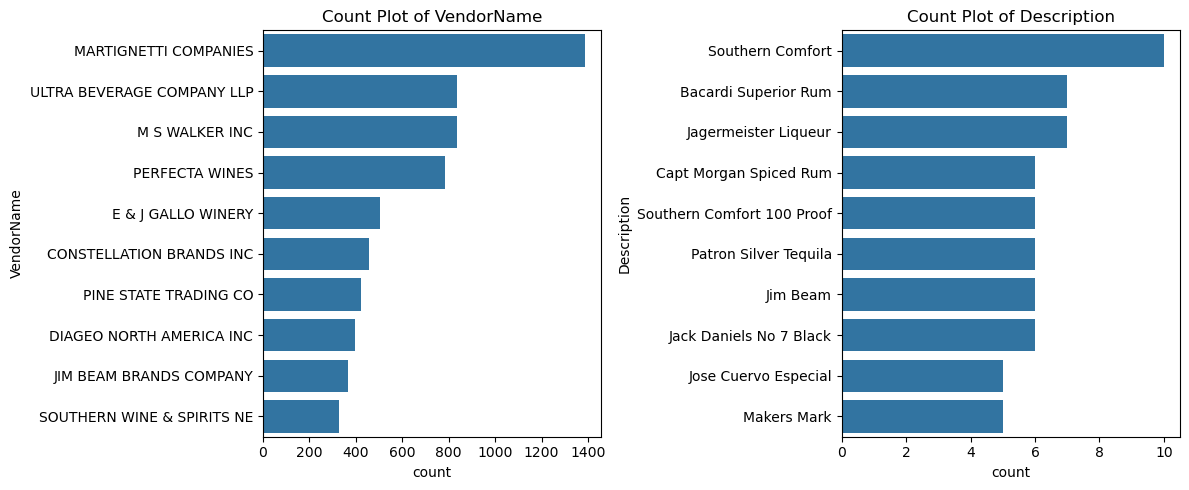

In [60]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10] )
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Data Analysis

Identity Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [61]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
9646,Zuccardi Q Malbec,1639.18,23.981503
9647,Zum Rsl,10857.34,32.675038
9648,Zwack Liqueur,227.88,16.653502
9649,g Sake,819.92,-69.192116


In [62]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)



In [63]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
     (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
     (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
7777,Santa Rita Organic Svgn Bl,9.99,66.466466
2896,Debauchery Pnt Nr,11.58,65.975820
2537,Concannon Glen Ellen Wh Zin,15.95,83.448276
2677,Crown Royal Apple,27.86,89.806174
7818,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
8939,Tommasi Poggio Tufo Cab Svgn,269.73,74.789604
9229,Vigne A Porrona Rosso,272.79,96.825397
3980,Gifft Chardonnay,279.80,94.245890
5736,Mad Dogs & Englishmen Jumil,279.80,97.666190


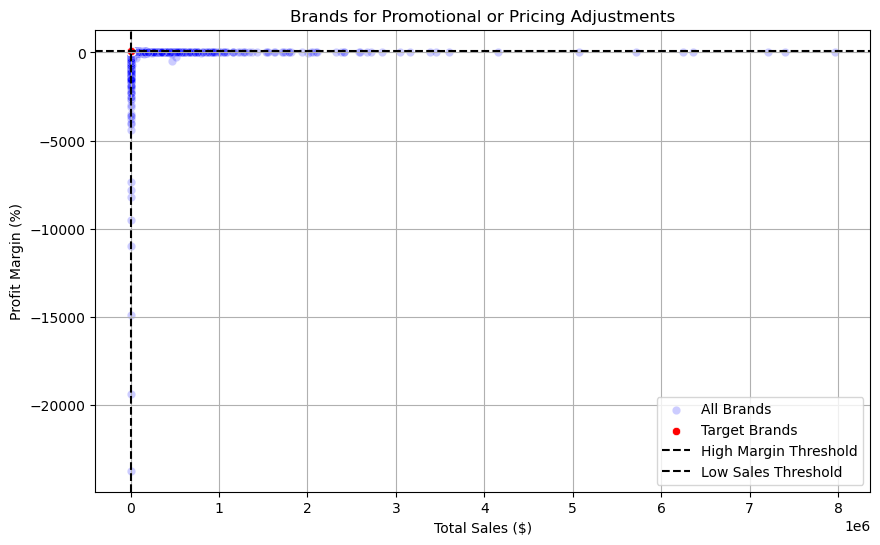

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performance?

In [65]:
# Top Vendors and Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      68739834.97
MARTIGNETTI COMPANIES         40960117.82
PERNOD RICARD USA             32279544.17
JIM BEAM BRANDS COMPANY       31898621.16
BACARDI USA INC               25005365.79
CONSTELLATION BRANDS INC      24467134.23
E & J GALLO WINERY            18553774.66
BROWN-FORMAN CORP             18476611.60
ULTRA BEVERAGE COMPANY LLP    17802646.10
M S WALKER INC                15436066.26
Name: TotalSalesDollars, dtype: float64

In [66]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [67]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [68]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

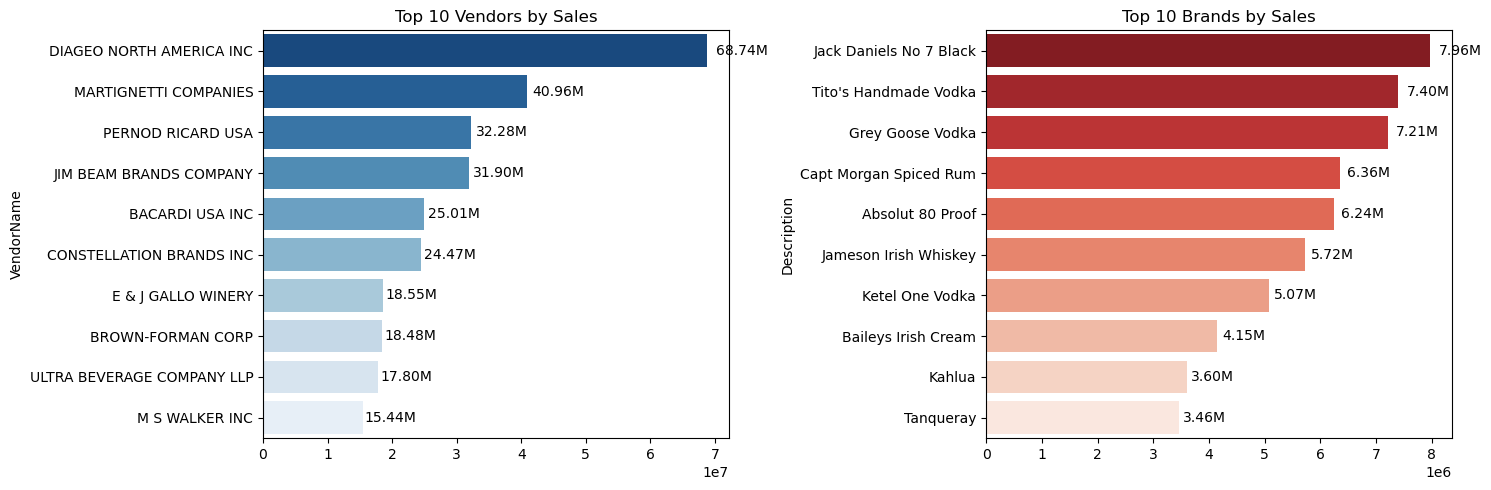

In [69]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x =top_brands.values, palette ="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha = 'left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [106]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [107]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100

In [108]:
vendor_performance['VendorName'].unique()

array(['AAPER ALCOHOL & CHEMICAL CO', 'ADAMBA IMPORTS INTL INC',
       'ALISA CARR BEVERAGES', 'ALTAMAR BRANDS LLC',
       'AMERICAN SPIRITS EXCHANGE', 'AMERICAN VINTAGE BEVERAGE',
       'APPOLO VINEYARDS LLC', 'ATLANTIC IMPORTING COMPANY',
       'BACARDI USA INC', 'BANFI PRODUCTS CORP', 'BLACK COVE BEVERAGES',
       'BLACK PRINCE DISTILLERY INC', 'BLACK ROCK SPIRITS LLC',
       'BRONCO WINE COMPANY', 'BROWN-FORMAN CORP', 'BULLY BOY DISTILLERS',
       'CALEDONIA SPIRITS INC', 'CAMPARI AMERICA', 'CANDIA VINEYARDS',
       'CAPSTONE INTERNATIONAL', 'CASTLE BRANDS CORP.',
       'CENTEUR IMPORTS LLC', 'CHARLES JACQUIN ET CIE INC',
       'CONSTELLATION BRANDS INC', 'CRUSH WINES', 'Circa Wines',
       'DELICATO VINEYARDS INC', 'DIAGEO CHATEAU ESTATE WINES',
       'DIAGEO NORTH AMERICA INC', 'DISARONNO INTERNATIONAL LLC',
       'DJINN SPIRITS LLC', 'DUGGANS DISTILLED PRODUCTS',
       'Dunn Wine Brokers', 'E & J GALLO WINERY', 'EDRINGTON AMERICAS',
       'FABRIZIA SPIRITS LLC', '

In [109]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False), 2)


In [110]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
28,DIAGEO NORTH AMERICA INC,50959796.85,17780038.12,68739834.97,15.83
63,MARTIGNETTI COMPANIES,27861690.02,13098427.80,40960117.82,8.66
50,JIM BEAM BRANDS COMPANY,24203151.05,7695470.11,31898621.16,7.52
74,PERNOD RICARD USA,24124091.56,8155452.61,32279544.17,7.49
8,BACARDI USA INC,17624378.72,7380987.07,25005365.79,5.48
...,...,...,...,...,...
36,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
0,AAPER ALCOHOL & CHEMICAL CO,105.07,-105.07,0.00,0.00
91,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
19,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [111]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
28,DIAGEO NORTH AMERICA INC,50.96M,17.78M,68.74M,15.83
63,MARTIGNETTI COMPANIES,27.86M,13.10M,40.96M,8.66
50,JIM BEAM BRANDS COMPANY,24.20M,7.70M,31.90M,7.52
74,PERNOD RICARD USA,24.12M,8.16M,32.28M,7.49
8,BACARDI USA INC,17.62M,7.38M,25.01M,5.48
23,CONSTELLATION BRANDS INC,15.57M,8.89M,24.47M,4.84
14,BROWN-FORMAN CORP,13.53M,4.95M,18.48M,4.20
114,ULTRA BEVERAGE COMPANY LLP,13.21M,4.59M,17.80M,4.10
33,E & J GALLO WINERY,12.29M,6.26M,18.55M,3.82
59,M S WALKER INC,10.94M,4.50M,15.44M,3.40


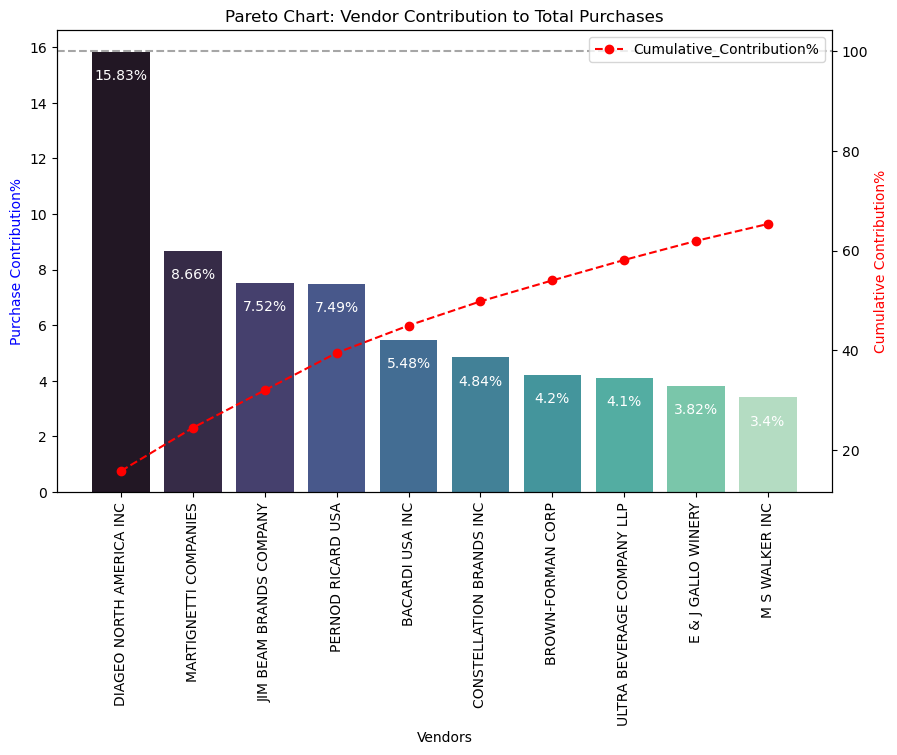

In [132]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color = 'red'
         , marker='o', linestyle='dashed', label='Cumulative_Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution%', color='blue')
ax2.set_ylabel('Cumulative Contribution%', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

In [ ]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

ValueError: Invalid format specifier '.2f%' for object of type 'float'

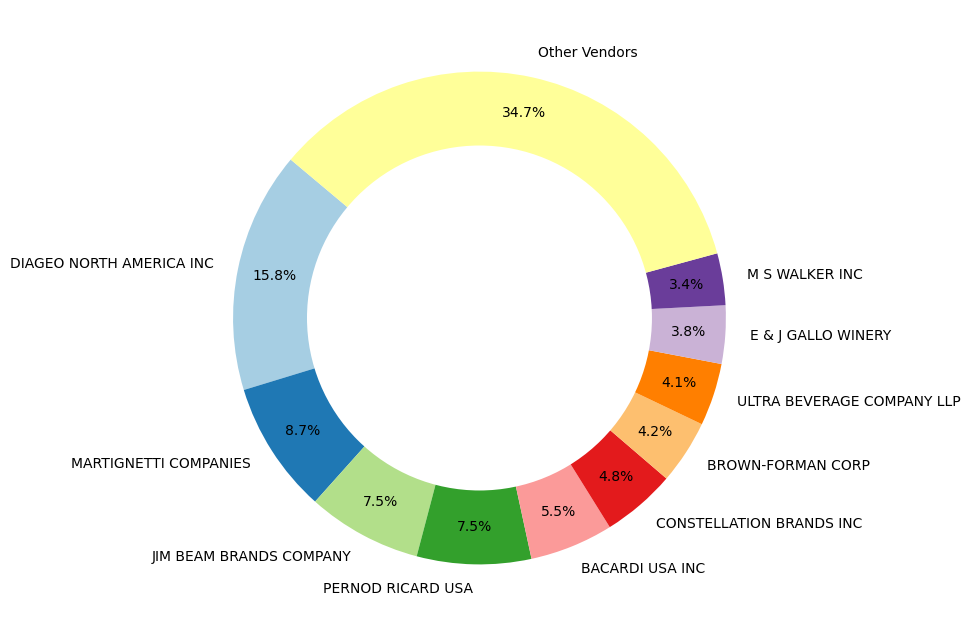

In [137]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize = (8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels= vendors, autopct='%1.1f%%', 
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f%}%",fontsize = 14, fontweight='bold', ha='centre', va='centre')

plt.title("Top Vendor's Purchase Contributions (%)")
plt.show()

Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [130]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [125]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"],q=3, labels=["Small", "Medium", "Large"])

In [128]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
10687,Small,2
10688,Small,6
10689,Small,2
10690,Small,1


In [131]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,43.776954
Medium,17.894005
Large,11.308807


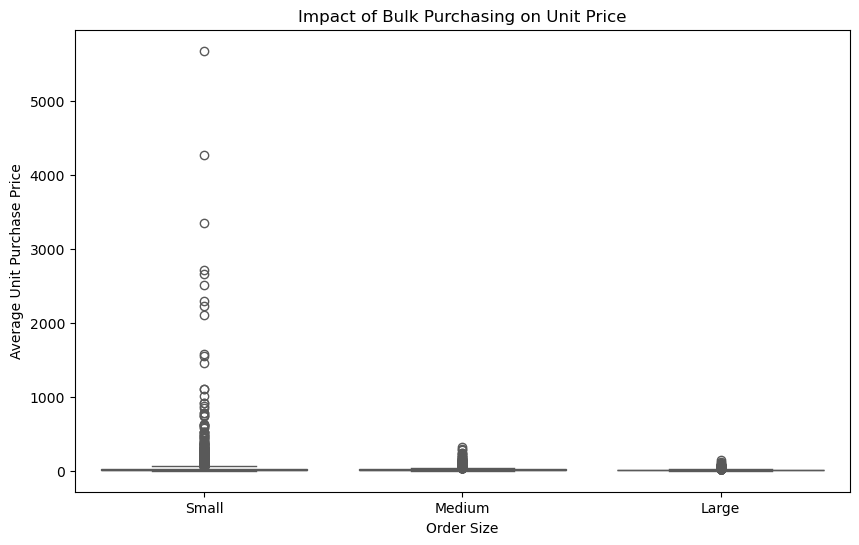

In [138]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

Which vendors have low inventory turnover, indicating excess stock and slow-moving products ?

In [141]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10)

,StockTurnover
VendorName,
AAPER ALCOHOL & CHEMICAL CO,0.000000
LAUREATE IMPORTS CO,0.000000
TRUETT HURST,0.041667
"IRA GOLDMAN AND WILLIAMS, LLP",0.075000
HIGHLAND WINE MERCHANTS LLC,0.148920
UNCORKED,0.217238
MILTONS DISTRIBUTING CO,0.236111
VINEYARD BRANDS LLC,0.256241
LOYAL DOG WINERY,0.308333


How much capital is locked in unsold inventory per vendory, and which vendors contribute the most to it?

In [144]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsolvedInventoryValue"].sum()))

Total Unsold Capital: 8.75M


In [145]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
28,DIAGEO NORTH AMERICA INC,980.09K
63,MARTIGNETTI COMPANIES,928.99K
50,JIM BEAM BRANDS COMPANY,857.80K
114,ULTRA BEVERAGE COMPANY LLP,780.27K
73,PERFECTA WINES,571.81K
74,PERNOD RICARD USA,554.74K
59,M S WALKER INC,469.96K
125,WILLIAM GRANT & SONS INC,436.49K
33,E & J GALLO WINERY,315.20K
14,BROWN-FORMAN CORP,284.91K


What is the 95% confidence intervals for  profit margins of top-performing and low-performing vendors?

In [168]:
df = df[df['ProfitMargin']>0]

In [170]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [171]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [172]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3966    79.684817
4170    85.782102
5530    93.085860
5773    95.012530
5945    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [173]:
low_vendors

6728      4.111764
6761      6.145626
6825     12.007271
6828      1.677308
6861      7.239599
           ...    
10687    83.448276
10688    96.436186
10689    25.252525
10690    98.974037
10691    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [174]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1)/np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1+ confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI :(30.74, 31.61, Mean: 31.18
Low Vendors 95% CI :(40.50, 42.64, Mean: 41.57


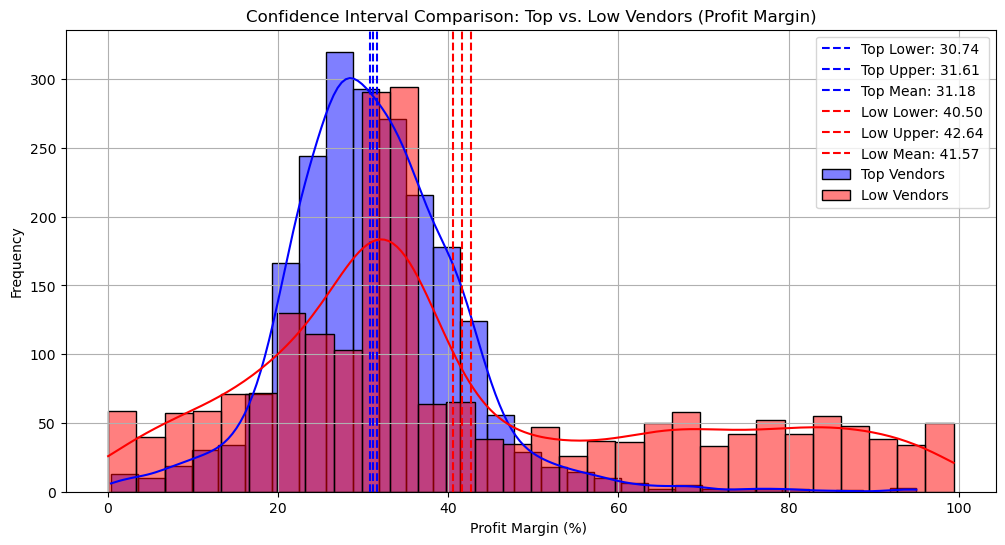

In [175]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI :({top_lower:.2f}, {top_upper:.2f}, Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI :({low_lower:.2f}, {low_upper:.2f}, Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%) ")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

 Is there a significant difference in profit margin between top-performing and low-performing vendors?

In [ ]:
# H0(Null Hypothesis) : There is no significant difference in the mean profit margins of top performing and low performing vendors
# H1(Alternative Hypothesis): The mean profit margins of top performing and low-performing vendors are significantly different

In [176]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value <0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top and low-performing vendors.
